## Lab 9: Births

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Thursday, April 16**.

In [1]:
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# This is for linear regression
from sklearn.linear_model import LinearRegression

# This is for logistic regression
from sklearn.linear_model import LogisticRegression

### North Carolina Births Data

In this lab, we will work with a dataset of births in North Carolina. A series of variables were collected, most notably the smoking habit of the mother as well as the birthweight of the baby. We are interested in what factors are associated with a low birthweight. We'll first look at predicting `birthweight` as a numerical variable, then use the categorical `lowbirthweight` and try to predict low birthweight status using logistic regression.

In [2]:
ncbirths = Table.read_table('ncbirths.csv')

In [3]:
ncbirths.show(5)

mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
15,younger mom,41,full term,6,married,34,8,not low,male,nonsmoker,white
15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white


Note that we need to work with the data a little bit to be able to fit a model using categorical data. The `sklearn` package only allows for categorical variables that have been changed into dummy variables (that is, 0/1 variables). So, we're going to need to create new variables that contain the same information, except as numbers. Luckily, True/False maps onto 1/0, so we can just do comparisons. We'll use a lot of these variables later, so let's do some cleaning now.

In [4]:
ncbirths_dummy = ncbirths.with_columns('premature', ncbirths.column('premie') == 'premie', # True if premature, False if not
                     'female', ncbirths.column('gender') == 'female', # True if female, False if not
                     'smoker', ncbirths.column('habit') == 'smoker', # True if smoker, False if not
                     'label', ncbirths.column('lowbirthweight') == 'low') # Our outcome. True if low birthweight, False if not


ncbirths_dummy.show(5)

mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom,premature,female,smoker,label
13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white,False,False,False,False
14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white,False,False,False,False
15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white,False,True,False,False
15,younger mom,41,full term,6,married,34,8,not low,male,nonsmoker,white,False,False,False,False
15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white,False,True,False,False


In [5]:
# Drop redundant rows now
ncbirths_clean = ncbirths_dummy.drop('premie', 'gender', 'habit','lowbirthweight')
ncbirths_clean.show(5)

mage,mature,weeks,visits,marital,gained,weight,whitemom,premature,female,smoker,label
13,younger mom,39,10,married,38,7.63,not white,False,False,False,False
14,younger mom,42,15,married,20,7.88,not white,False,False,False,False
15,younger mom,37,11,married,38,6.63,white,False,True,False,False
15,younger mom,41,6,married,34,8,white,False,False,False,False
15,younger mom,39,9,married,27,6.38,not white,False,True,False,False


Now that we've cleaned up our dataset, let's try doing a linear regression with a categorical predictor.

<font color = 'red'>**Question 1. Set up the predictor and outcome variables to run the linear regression, using `smoker` as the predictor and `birthweight` as the outcome.**</font>

**Hint:** This is done the same way as the linear regression in Lab 8, except using `smoker` when defining `predictor`, which happens to be a categorical variable.

In [ ]:
ols = LinearRegression()

predictor = ...
outcome = ...

ols.fit(X = predictor, y = outcome)
print(ols.coef_)
print(ols.intercept_)

### Multiple Regression

You can also add additional predictor variables to the linear regression to try to better predict the outcome. This is done by simply adding more variables the `select` statement when defining the predictor.

In [6]:
multiple_ols = LinearRegression()

predictor = ncbirths_clean.select('mage', 'weeks', 'female', 'smoker').rows
outcome = ncbirths_clean.column('weight')

multiple_ols.fit(X = predictor, y = outcome)
print(multiple_ols.coef_)
print(multiple_ols.intercept_)

[ 0.01700379  0.33898851 -0.38979814 -0.36367746]
-6.105330937257687


<font color = 'red'>**Question 2. Write out the form of the equation in the model that we just ran above.**</font>

*Your answer here*

## Using a Logistic Regression

A logistic regression is essentially the same as a linear regression, except we have a binary (two category) categorical variable instead of a numerical variable as the outcome, and we get predicted probabilities out of the predictions. The way we fit a logistic regression model is essentially the same as a linear regression model with `sklearn`. We set up a `LogisticRegression` object first, then we use `fit` to provide it the data. 

In [7]:
# Create a model object
logit = LogisticRegression(solver = 'lbfgs')

In [8]:
# Define predictor and outcome
predictor = ncbirths_clean.select('mage', 'weeks', 'female', 'smoker').rows
outcome = ncbirths_clean.column('label')

In [9]:
# Fit the model
logit.fit(X = predictor, y = outcome)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We can get the coefficients and intercept the same way as well.

In [10]:
logit.coef_

array([[-0.0091871 , -0.69295886,  0.27921399,  0.60224011]])

In [11]:
logit.intercept_

array([23.57294249])

<font color = 'red'>**Question 3. Write out the form of the equation in the logistic regression model that we just ran. You can just use `logit(birthweight status)` as the outcome instead of writing out the logit transformation.**</font>

*Your answer here.*

<font color = 'red'>**Question 4. Try adding another predictor to the logistic regression model. Make sure you do not use `weight`, since that is exactly what the `lowbirthweight` variable is based on. How does your model change? What are the coefficients? How would you interpret the coefficients for the variable you added?**</font>

### Predictions using Logistic Regression

To do predictions, we use the `predict_proba` method rather than the `predict` method. This will give us a set of two probabilities for each row. The first represents the probability of a 0, while the second represents the probability of a 1. Here, we are more interested in predicting the probability that a baby will have a low birthweight so that we can provide some sort of help or care in advance. So, we'll just try to find the ones with the highest probability. 

In this example, we simply use the same dataset (`ncbirths`) to make predictions, but in reality, you'd use a different dataset. In the next part of this class, we'll go over something called training and testing data that can help improve your models and their performance on future data. 

In [12]:
# Predict for each element in original dataset
# Each row has probabilities for 0 and 1
# Should add up to one on each row.
logit.predict_proba(predictor)

array([[0.97266536, 0.02733464],
       [0.99652939, 0.00347061],
       [0.87270917, 0.12729083],
       ...,
       [0.98634119, 0.01365881],
       [0.12479068, 0.87520932],
       [0.97423396, 0.02576604]])

In [13]:
# Let's extract predicted probability of being low birthweight.
# The [:,1] means that we want everything from the rows, and only the column with index 1 (so, the second column)
lowbirthweight_probability = logit.predict_proba(predictor)[:,1]

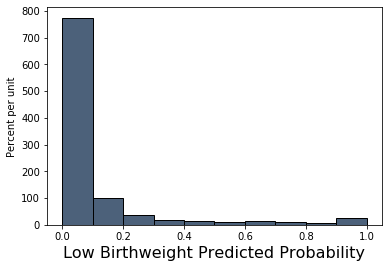

In [14]:
Table().with_column('Low Birthweight Predicted Probability',lowbirthweight_probability).hist()

<font color = 'red'>**Question 5. What would be the predicted probability of a baby being lowbirthweight according to our model if the mother's age was 30, the pregnancy lasted 36 weeks, the mother was not a smoker, and the baby was female?**</font>

**Hint:** You'll need to create a Table to pass to `predict_proba`. See Lab 8 for an example of how to do this.